In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import datatime

In [2]:
file = "./data/Unfaelle_Deutschland.csv"
table_accident = pd.read_csv(file, sep=';', 
                    header=[6], 
                    encoding='ISO-8859-1',
                    index_col=[0, 1],
                    engine='python',
                    skipfooter=3)
# table = table.drop(columns='Unnamed: 3')
table_accident = table_accident.T.reset_index()
table_accident.rename(columns={'index':'Jahr'}, inplace=True)
table_accident

Jahr Unfälle mit Personenschaden                              \
                           innerorts außerorts (ohne Autobahnen)   
0   2008                      221306                       81039   
1   2009                      213361                       79051   
2   2010                      195833                       73635   
3   2011                      210427                       77549   
4   2012                      206696                       75094   
5   2013                      199650                       73003   
6   2014                      209618                       73916   
7   2015                      209821                       75725   
8   2016                      211686                       75266   
9   2017                      207562                       74166   
10  2018                      213124                       75060   
11  2019                      207625                       72538   
12  2020                      183412                       65850   

                            Schwerwiegende Unfälle mit Sachschaden i.e.S  \
   auf Autobahnen Insgesamt                                    innerorts   
0           18269    320614                                        53730   
1           18394    310806                                        51601   
2           18829    288297                                        51388   
3           18290    306266                                        48435   
4           17847    299637                                        48571   
5           18452    291105                                        47582   
6           18901    302435                                        42192   
7           20113    305659                                        40709   
8           21193    308145                                        42168   
9           20928    302656                                        43375   
10          20537    308721                                        40461   
11          19980    300143                                        40569   
12          15237    264499                                        33880   

                                                         \
   außerorts (ohne Autobahnen) auf Autobahnen Insgesamt   
0                        24086          13328     91144   
1                        23643          14275     89519   
2                        24035          16684     92107   
3                        21476          11576     81487   
4                        21610          11966     82147   
5                        21240          12002     80824   
6                        18101          10186     70479   
7                        18079           9988     68776   
8                        18664          10806     71638   
9                        19341          11745     74461   
10                       18342          10358     69161   
11                       18129          10491     69189   
12                       15418           8716     58014   

   Sonst. Unfälle unter dem Einfluss berausch. Mittel  ...                 \
                                            innerorts  ... auf Autobahnen   
0                                               15275  ...            653   
1                                               14435  ...            617   
2                                               13426  ...            635   
3                                               13627  ...            640   
4                                               13488  ...            651   
5                                               12977  ...            620   
6                                               12510  ...            619   
7                                               12134  ...            684   
8                                               12773  ...            796   
9                                               12901  ...            765   
10                              

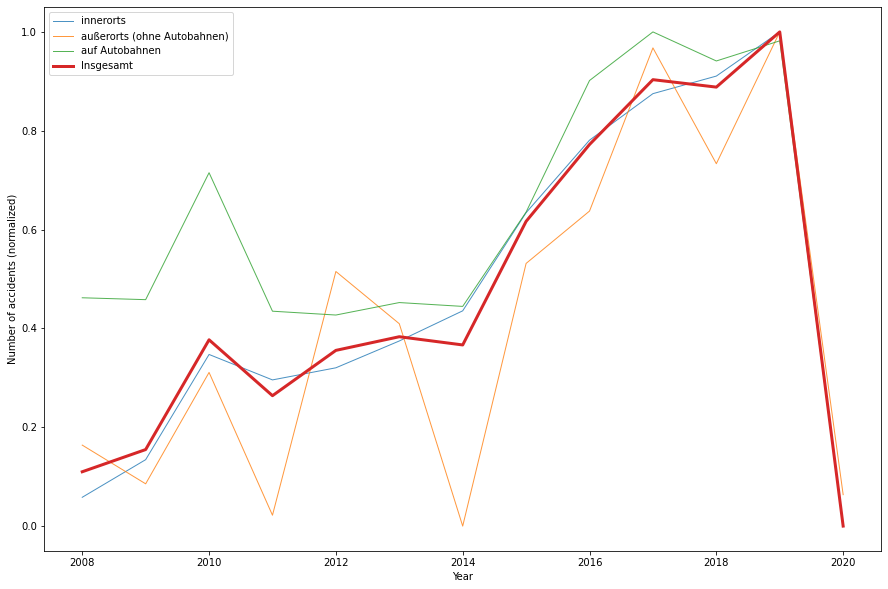

In [3]:
streets = ['innerorts', 'außerorts (ohne Autobahnen)', 'auf Autobahnen', 'Insgesamt']
years = table_accident['Jahr'].astype(int)

plt.figure(figsize=(15, 10))
for street in streets:
    total_accident = table_accident['Insgesamt', street]#.astype(int)
    # min-max normalization
    total_accident = (total_accident-total_accident.min())/(total_accident.max()-total_accident.min())
    
    # plot lines
    if street == 'Insgesamt':
        plt.plot(years, total_accident, linewidth=3, alpha=1, label=street)
    else:
        plt.plot(years, total_accident, linewidth=1, alpha=0.8, label=street)
plt.xlabel('Year')
plt.ylabel('Number of accidents (normalized)')
plt.title('')
plt.legend()
# plt.savefig('./imgs/total_accident.pdf', bbox_inches='tight') # save figure as pdf
plt.show()

In [5]:
Accidents_last_year = table_accident.loc[(table_accident['Jahr'] == '2008')]['Insgesamt','Insgesamt'].values.astype(int)
Years = table_accident['Jahr'].unique()

for i, Year in enumerate(Years[1:]):
    Accidents_this_year = table_accident.loc[
        (table_accident['Jahr'] == Year)]['Insgesamt','Insgesamt'].values.astype(int)
    increase = (Accidents_this_year/Accidents_last_year-1)*100
    print('Increase/Decrease of number of accidents ofyear {} compared to previous year {}: {:.2f}%' 
          .format(Years[i], Years[i-1], increase[0]))
    Accidents_last_year=Accidents_this_year

Increase/Decrease of number of accidents ofyear 2008 compared to previous year 2020: 0.86%
Increase/Decrease of number of accidents ofyear 2009 compared to previous year 2008: 4.23%
Increase/Decrease of number of accidents ofyear 2010 compared to previous year 2009: -2.07%
Increase/Decrease of number of accidents ofyear 2011 compared to previous year 2010: 1.71%
Increase/Decrease of number of accidents ofyear 2012 compared to previous year 2011: 0.51%
Increase/Decrease of number of accidents ofyear 2013 compared to previous year 2012: -0.30%
Increase/Decrease of number of accidents ofyear 2014 compared to previous year 2013: 4.58%
Increase/Decrease of number of accidents ofyear 2015 compared to previous year 2014: 2.72%
Increase/Decrease of number of accidents ofyear 2016 compared to previous year 2015: 2.23%
Increase/Decrease of number of accidents ofyear 2017 compared to previous year 2016: -0.25%
Increase/Decrease of number of accidents ofyear 2018 compared to previous year 2017: 1.